In [1]:
# 自定义损失计算函数

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 自定义损失函数
def customized_mse(y_true,y_predict):
    return tf.reduce_mean(tf.square(y_predict-y_true))
# mse=tf.keras.losses.MeanSquaredError() # 可使用框架提供的对象
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(loss=customized_mse,optimizer='sgd',
              metrics=['mean_squared_error']) # 对比验证自定义损失函数是否正确
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.9461 - mean_squared_error: 0.9461 - val_loss: 0.5468 - val_mean_squared_error: 0.5468
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4834 - mean_squared_error: 0.4834 - val_loss: 0.4769 - val_mean_squared_error: 0.4769
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4363 - mean_squared_error: 0.4363 - val_loss: 0.4513 - val_mean_squared_error: 0.4513
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4210 - mean_squared_error: 0.4210 - val_loss: 0.4317 - val_mean_squared_error: 0.4317
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4082 - mean_squared_error: 0.4082 - val_loss: 0.4287 - val_mean_squared_error: 0.4287
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4022 - mean_squared_error: 0.4022 - val_loss: 0.4129 - val_mean_squared_error: 0.4129
Epoch 7/100
363/363 [=

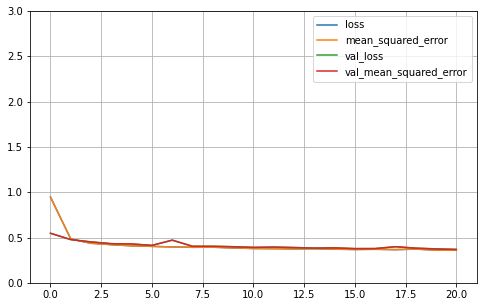

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()
plot_learning_curves(history)

In [9]:
print(model.evaluate(x_test_scaled, y_test, verbose=0))

[0.3681027293205261, 0.3681027293205261]


In [10]:
# 测试
y_true = np.random.randint(0, 2, size=(2, 3))
y_pred = np.random.random(size=(2, 3))
print(y_true)
print(y_pred)
loss=tf.keras.losses.mean_squared_error(y_true, y_pred) # 每行的均方误差
print(loss)
print(customized_mse(y_true, y_pred)) # 所有行的均方误差

[[0 0 1]
 [1 0 1]]
[[0.00760647 0.8813104  0.51214641]
 [0.13733881 0.66671087 0.91348774]]
tf.Tensor([0.33825567 0.39872403], shape=(2,), dtype=float64)
tf.Tensor(0.3684898468349705, shape=(), dtype=float64)


In [13]:
(loss[0]+loss[1])/2

<tf.Tensor: shape=(), dtype=float64, numpy=0.36848984683497055>